In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan
from pandarallel import pandarallel

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [3]:
ab = '../../lr_bulk/talon/human_talon_abundance.tsv'
filt_ab = '../../lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
read_annot = '../../lr_bulk/talon/human_talon_read_annot.tsv'
t_metadata = '../../refs/cerberus/v40_transcript_metadata.tsv'
swan_file = '../../lr_bulk/cerberus/swan/swan_meta.p'
cerberus_h5 = '../../lr_bulk/cerberus/triplets/cerberus_annot_triplets.h5'
major_isos = '../../lr_bulk/cerberus/swan/major_isos.tsv'

ver = 'v40_cerberus'

min_tpm = 1
gene_subset = 'protein_coding'
obs_col = 'sample'

mouse_ab = '../../mouse/lr_bulk/talon/mouse_talon_abundance.tsv'
mouse_filt_ab = '../../mouse/lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
mouse_read_annot = '../../mouse/lr_bulk/talon/mouse_talon_read_annot.tsv'
mouse_swan_file = '../../mouse/lr_bulk/swan/swan.p'
mouse_meta = '../../mouse/lr_bulk/lr_mouse_library_data_summary.tsv'
mouse_t_metadata = '../../mouse/refs/cerberus/vM25_transcript_metadata.tsv'
mouse_ver = 'vM25_cerberus'


## Density plots for protein coding genes for GENCODE v40, observed, observed major

{'source': 'v40', 'biotype_category': ['protein_coding']}
Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for protein_coding genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2023: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 34249
# genes >= 1 tpm: 29652
Applying gene type and novelty subset
Number of genes reported: 17530
{'source': 'obs_det', 'biotype_category': ['protein_coding']}
{'source': 'obs_major', 'biotype_category': ['protein_coding']}
figsize changed


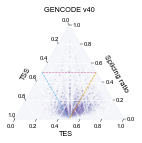

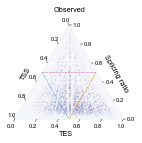

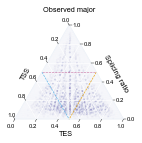

<Figure size 144x1440 with 0 Axes>

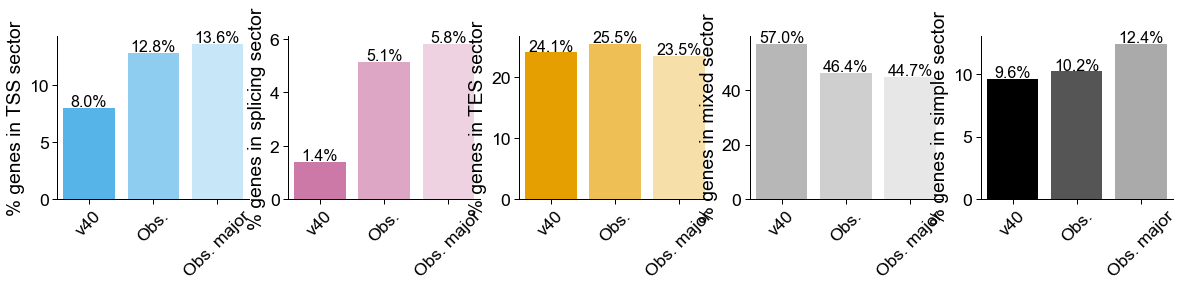

In [4]:
sources = ['v40', 'obs_det', 'obs_major']
titles = ['GENCODE v40', 'Observed', 'Observed major']
plot_density_simplices(cerberus_h5, 
                       filt_ab,
                       min_tpm,
                       sources,
                       titles, 
                       gene_subset,
                       ver)

## Simplex plot for AKAP8L

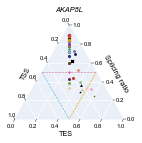

In [4]:
plot_obs_human_simplex_with_centroid(cerberus_h5,
                  'AKAP8L',
                  'figures/', 
                  source='sample_det',
                  gene_subset=gene_subset,
                  ver=ver)

## AKAP8L browser plots

Read in graph from ../../lr_bulk/cerberus/swan/swan_meta.p
Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2023: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 206806
Found 50 total samples
small text size: 20.3
big text size: 17.571194762684122


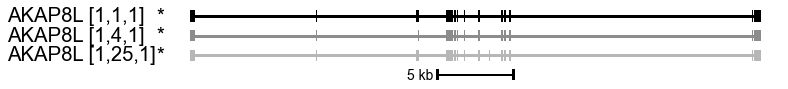

In [6]:
plot_browser_isos_2(cerberus_h5,
                    swan_file, 
                    filt_ab,
                    major_isos,
                    'AKAP8L',
                    obs_col,
                    'h9',
                    'figures/akap8l_h9_browser_isos.pdf',
                    h=0.2,
                    ref_sources=['v29', 'v40'])

Read in graph from ../../lr_bulk/cerberus/swan/swan_meta.p
Calculating iso TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 206806
Found 50 total samples
small text size: 20.3
big text size: 17.571194762684122


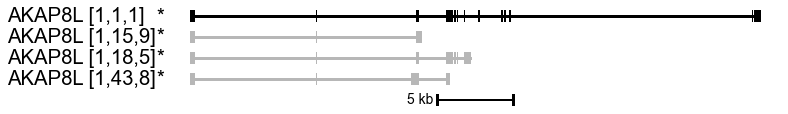

In [7]:
plot_browser_isos_2(cerberus_h5,
                    swan_file, 
                    filt_ab,
                    major_isos,
                    'AKAP8L',
                    obs_col,
                    'h9_panc_progen',
                    'figures/akap8l_h9_panc_progen_browser_isos.pdf',
                    h=0.2,
                    ref_sources=['v29', 'v40'])

## Gene triplets with splicing ratio for AKAP8L

In [8]:
# triplets for H9 and H9-derived panc. progen.
ca = cerberus.read(cerberus_h5)
ca.triplets.loc[(ca.triplets.source=='sample_det')&\
                (ca.triplets['sample'].isin(['h9', 'h9_panc_progen']))&\
                (ca.triplets.gname=='AKAP8L')]

,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,tss_ratio,tes_ratio,spl_ratio,sector,gname,sample,gene_tpm
66060,sample_det,ENSG00000011243,1.0,4.0,4.0,4.0,1.6,0.151515,0.606061,0.242424,tes,AKAP8L,h9_panc_progen,8.113447
561988,sample_det,ENSG00000011243,1.0,1.0,3.0,3.0,3.0,0.200000,0.200000,0.600000,splicing,AKAP8L,h9,14.475000


## Sample-level centroid vs. sample-level triplets distances

In [4]:
source = 'sample_det'
ca = cerberus.read(cerberus_h5)
ca = get_centroids(ca,
                   source=source,
                   gene_subset=gene_subset,
                   ver=ver)
df = compute_dists(ca, 
                   source1=source,
                   source2=f'{source}_centroid',
                   gene_subset=gene_subset,
                   ver=ver)

n = len(df.loc[df.z_score > 3, 'gid'].unique().tolist())
print(f'{n} genes have sample-level triplet vs. sample-level centroid z-score >3')

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:1300: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:1300: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)


2892 genes have sample-level triplet vs. sample-level centroid z-score >3
